#Import Libraries and Load Data 

In [56]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

from scipy import stats
from statsmodels.stats import weightstats as tests

# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm


In [5]:
# load data
auto=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# data information
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
# Change columns to small letters
auto.columns=map(str.lower,auto.columns)
auto.head()

,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [8]:
# drop irrelevant columns
auto.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], axis = 1,inplace=True) 

In [9]:
# rename postal code
df=auto.rename(columns={'postal code':'postal_code'})
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


# Tidying the Dataset

### Missing value and duplicates

In [10]:
# check of missing values
df.isnull().sum()

postal_code              0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

In [11]:
# check of duplicate values
df.duplicated().sum()

0

## Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


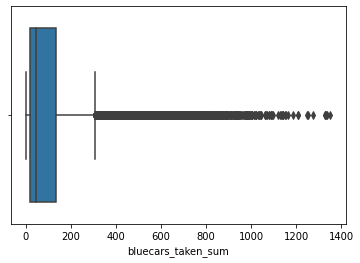

In [12]:
# find outliers of bluecars taken
sns.boxplot(df['bluecars_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


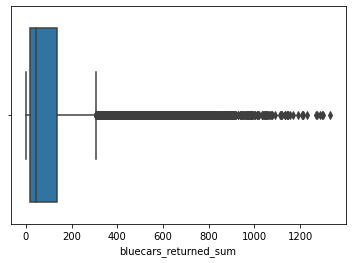

In [13]:
# find outliers on bluecars returned
sns.boxplot(df['bluecars_returned_sum'])

# Univariate Analysis

## Bar Charts, Histograms

In [14]:
df.head(3)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27


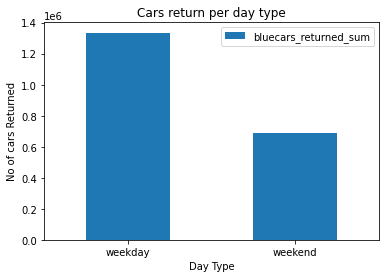

In [15]:
# group by day type
df_auto=df.groupby(['day_type']).sum().reset_index()
df_auto 
# plotting bar charts of bluecar return against day type

df_auto.plot.bar(x='day_type', y='bluecars_returned_sum', rot=0)

# Labelling our x axis
plt.xlabel("Day Type")

# Labelling our y axis
plt.ylabel("No of cars Returned")

# Giving a title to our Bar chart
plt.title("Cars return per day type")

# Displaying our chart
plt.show()

From the above bar chart most of the people return the car mostly during weekdays

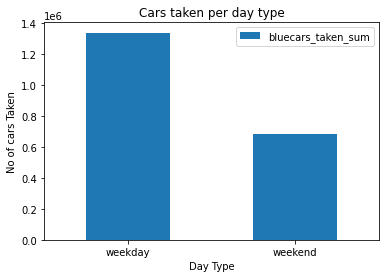

In [16]:
# plotting bar charts of bluecar taken against day type

df_auto.plot.bar(x='day_type', y='bluecars_taken_sum', rot=0)

# Labelling our x axis
plt.xlabel("Day Type")

# Labelling our y axis
plt.ylabel("No of cars Taken")

# Giving a title to our Bar chart
plt.title("Cars taken per day type")

# Displaying our chart
plt.show()

From above bar chart it shows that most of the people take car on weekdays

## Pie Chart

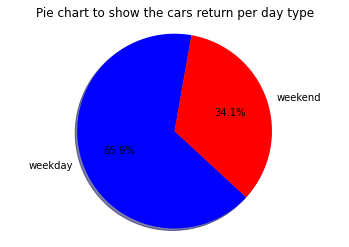

In [17]:
# Plotting pie chart
colors = ['blue', 'red']
day_type= df_auto['day_type']
car_return=df_auto['bluecars_returned_sum']

# plotting the pie chart
plt.pie(car_return, labels=day_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=80)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart to show the cars return per day type')
plt.axis('equal')
plt.show()

This chart shows that 65.9% return ther car on a weekday while 34.1% return the car on a weekend. 

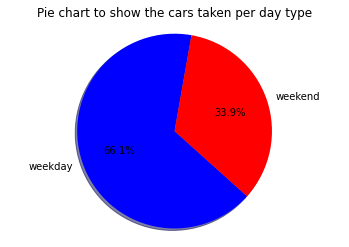

In [18]:
# Plotting pie chart
colors = ['blue', 'red']
day_type= df_auto['day_type']
car_take=df_auto['bluecars_taken_sum']

# plotting the pie chart
plt.pie(car_take, labels=day_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=80)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart to show the cars taken per day type')
plt.axis('equal')
plt.show()

This chart shows that 66.1% take the car on a weekday while 33.9% take the car on a weekend.

## Central Tendency

### Bluecars Taken

In [19]:
# Mean of cars taken
df['bluecars_taken_sum'].mean()

125.92695057506994

In [20]:
# median
df['bluecars_taken_sum'].median()

46.0

In [21]:
# mode
df['bluecars_taken_sum'].mode()

0    12
dtype: int64

In [22]:
#  Kurtosis
# Below shows the kurtosis is greater than zero, 
# this means that the data is much distributed more around the mean
df['bluecars_taken_sum'].kurt()

6.172692305510042

### Bluecars Return

In [23]:
# Mean of cars taken
df['bluecars_returned_sum'].mean()

125.912713708424

In [24]:
df['bluecars_returned_sum'].median()

46.0

In [25]:
df['bluecars_returned_sum'].mode()

0    13
dtype: int64

In [26]:
#  Kurtosis
# Below shows the kurtosis is greater than zero, 
# this means that the data is much distributed more around the mean
df['bluecars_returned_sum'].kurt()

6.1862880957582345

# Bivariate Analysis

## Line Chart

In [31]:
day

,postal_code,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
dayofweek,,,,,,
0,210798114,3413410,263893,264808,47022,47068
1,209792758,3391795,261940,260470,47095,46969
2,201374176,3229754,261849,260673,47331,47223
3,201373006,3215069,263207,262961,48200,48023
4,201653236,3257976,288546,286029,52143,52234
5,201283506,3246982,353934,351570,63098,63349
6,201933166,3267967,332166,338795,59099,59126


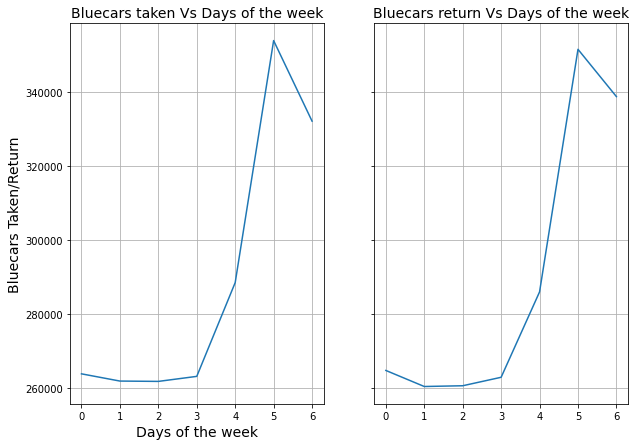

In [32]:
# group by days of the week
day=df.groupby(['dayofweek']).sum().reset_index()
# line gragh for both  return and taken
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=[10,7])
ax[0].plot(day['dayofweek'],day['bluecars_taken_sum'])
ax[1].plot(day['dayofweek'],day['bluecars_returned_sum'])

ax[0].set_xlabel('Days of the week', fontsize=14)
ax[0].set_ylabel('Bluecars Taken/Return', fontsize=14)
ax[0].set_title('Bluecars taken Vs Days of the week', fontsize=14)
ax[1].set_title('Bluecars return Vs Days of the week', fontsize=14)
ax[0].grid(True)
ax[1].grid(True)


Days of the week are represented as :-
0 = Monday
1 = Tuesday
2 = Wednesday
3 = Thursday
4 = Friday
5 = Saturday
6 = Sunday

## Scatter Plots

Text(0, 0.5, 'Bluecars Taken')

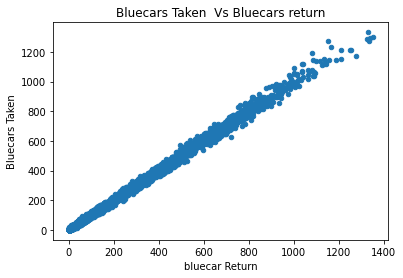

In [33]:
df.plot(x='bluecars_taken_sum',y='bluecars_returned_sum', kind='scatter')

# Giving our scatterplot a title
plt.title('Bluecars Taken  Vs Bluecars return')

# Labelling our x axis
plt.xlabel('bluecar Return')

# Labelling our y axis
plt.ylabel('Bluecars Taken')


This shows that there is a correlation between bluecars return and bluecars taken

# Hypothesis Testing

We would like to test if there is statistical diffrence between monday and friday on bluecars being taken.


H0 = There is no statistical difference between the mean of bluecars taken on monday and friday.

H1 = There is a statistical difference between the mean of bluecars taken on monday and friday.

In [34]:
# data for monday
monday= df.loc[df['dayofweek']==0]
monday

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
7,75001,1/8/2018,1438,0,weekday,84,83,14,15
14,75001,1/15/2018,1440,0,weekday,107,107,15,15
21,75001,1/22/2018,1440,0,weekday,123,116,14,14
28,75001,1/29/2018,1440,0,weekday,83,81,17,16
...,...,...,...,...,...,...,...,...,...
16055,95880,5/21/2018,1440,0,weekday,26,27,0,0
16062,95880,5/28/2018,1440,0,weekday,4,5,0,0
16069,95880,6/4/2018,1440,0,weekday,10,13,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0


In [35]:
# data for friday
friday=df.loc[df['dayofweek']==4]
friday

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
11,75001,1/12/2018,1439,4,weekday,126,127,11,13
18,75001,1/19/2018,1440,4,weekday,130,130,17,19
25,75001,1/26/2018,1437,4,weekday,145,146,35,37
32,75001,2/2/2018,1440,4,weekday,146,147,28,28
...,...,...,...,...,...,...,...,...,...
16049,95880,5/4/2018,1435,4,weekday,19,20,0,0
16059,95880,5/25/2018,1440,4,weekday,9,10,0,0
16066,95880,6/1/2018,1440,4,weekday,8,10,0,0
16073,95880,6/8/2018,1438,4,weekday,11,9,0,0


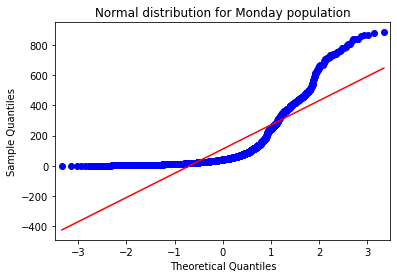

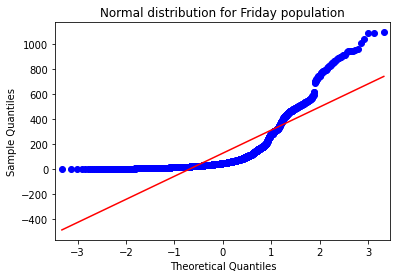

In [40]:
# check for normal distribution for bluecars taken on monday(population)
# q-q plot
qqplot(monday['bluecars_taken_sum'], line='s')
plt.title('Normal distribution for Monday population')
plt.show()

# check for normal distribution for bluecars taken on friday(population)
# q-q plot
qqplot(friday['bluecars_taken_sum'], line='s')
plt.title('Normal distribution for Friday population')
plt.show()
# The resulting QQ plot shows the scatter plot of points in a diagonal line, 
# closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.
# There are a few small deviations, especially at the bottom of the plot, 
# which is to be expected given the small data sample.

Both are light tailed normal distribution

In [41]:
# we will take sample size of 100 on bluecars return on monday
monday_sample=monday['bluecars_taken_sum'].sample(n=100, random_state=1)
monday_sample

15503     66
7618      32
123      118
861      230
10462      3
        ... 
9141       4
14784      9
15875      8
4337      11
10910     40
Name: bluecars_taken_sum, Length: 100, dtype: int64

In [42]:
# we will take sample size of 100 on bluecars return on friday
friday_sample=friday['bluecars_taken_sum'].sample(n=100, random_state=1)
friday_sample

9183      13
761      299
10552      8
6092      84
14334     47
        ... 
11642     16
9829     101
463      220
13111    111
768      303
Name: bluecars_taken_sum, Length: 100, dtype: int64

Since we are testing the difference between two samples this means

we will take:

- mean for monday to be = monday_mean
- mean for friday to be = friday_mean 

To test if they are equal the mean diffrence should b equal to 0 i.e:

- monday_mean-friday_mean = 0

We will take our singnificant level to be 0.05

In [45]:
# Perform our Z-test
z_test ,p_value = tests.ztest(monday_sample, x2=friday_sample, value=0,alternative='two-sided')
print('P-value=',float(p_value))
print('Test statistic=',float(z_test))
if p_value<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")


P-value= 0.5660542407153357
Test statistic= -0.5738722676873629
Accept null hypothesis


Interpretation of Results.


Since the p-value (0.5660542407153357) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that there is significant difference between the mean of bluecars returned on monday and friday.

## Point Estimate

In [48]:
# to get point estimation of the two population we do the diffrence of the two sample
point_est=(friday_sample.mean())-(monday_sample.mean())
point_est

12.710000000000008

We estimate that the average Blue cars taken is higher on Friday, is  12.71  points higher than those being taken on Monday.

## Confidence Interval

In [75]:
# calculate confidence interval
m=sm.stats.DescrStatsW(monday['bluecars_taken_sum']).zconfint_mean()

(104.69846992944196, 117.6208224041722)

In [71]:
f=sm.stats.DescrStatsW(friday['bluecars_taken_sum']).zconfint_mean()


In [74]:
m,f

((104.69846992944196, 117.6208224041722),
 (119.47421194787081, 134.6393943929482))

We are 95% confident that the difference in mean of monday and friday bluecars taken for the first line is for monday and second is friday